In [3]:
pip install numpy


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:

pip install nltk


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:

pip install nltk


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [10]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [13]:
# loading the dataset to a pandas DataFrame
news_dataset = pd.read_csv('train.csv')

In [14]:
news_dataset.shape


(20800, 5)

In [15]:
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


C:\Users\hp\AppData\Local\Temp\ipykernel_6260\1529447720.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data = news_dataset, palette = 'mako',saturation = 1)


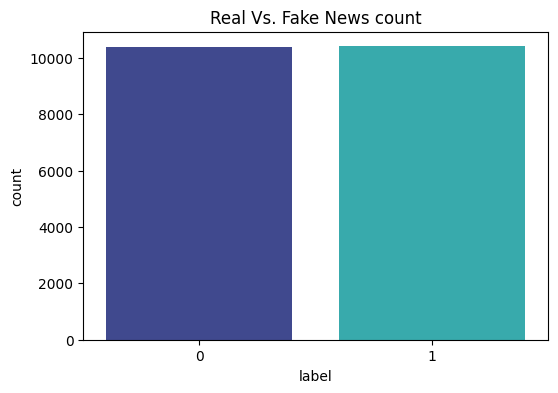

In [16]:
plt.figure(figsize = (6,4))
sns.countplot(x='label', data = news_dataset, palette = 'mako',saturation = 1)
plt.title("Real Vs. Fake News count", fontsize = 12)
plt.show()

In [17]:
# counting the number of missing values in the dataset
news_dataset.isnull().sum()


id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [18]:
# replacing the null values with empty string
news_dataset = news_dataset.fillna('')


In [19]:
# merging the author name and news title
news_dataset['content'] = news_dataset['author']+' '+news_dataset['title']
print(news_dataset['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [20]:
# separating the data & label
news_dataset = news_dataset.sample(n=500)
X = news_dataset.drop(columns='label', axis=1)
Y = news_dataset['label']
print(X)
print(Y)

          id                                              title  \
2239    2239  U.S. Presidential Race, North Dakota, NASA: Yo...   
18124  18124  Gambia’s President, in Power 22 Years, Loses E...   
15452  15452      The Bundy Verdict is Another Defeat for Obama   
3455    3455  Kareem Abdul-Jabbar: ’La La Land’ Sends ’Bigot...   
12413  12413                  Trump’s Slim Chance for Greatness   
...      ...                                                ...   
555      555                                                      
1358    1358  Mike Lee: Health Care Bill ’Is Going to Fail’ ...   
15392  15392  A Letter to the Doctors and Nurses Who Cared f...   
12806  12806  Watch: Kenny G Performs for Delta Passengers o...   
5211    5211  They Said What?!: Find Out What Magnus Carlsen...   

                                      author  \
2239   Andrea Kannapell and Sandra Stevenson   
18124    Jaime Yaya Barry and Dionne Searcey   
15452                      Daniel Greenfield   
345

In [21]:
port_stem = PorterStemmer()


In [22]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content


In [23]:
news_dataset['content'] = news_dataset['content'].apply(stemming)
print(news_dataset['content'])

2239     andrea kannapel sandra stevenson u presidenti ...
18124    jaim yaya barri dionn searcey gambia presid po...
15452    daniel greenfield bundi verdict anoth defeat o...
3455     breitbart news kareem abdul jabbar la la land ...
12413             consortiumnew com trump slim chanc great
                               ...                        
555                                         anthoni dillon
1358     jeff poor mike lee health care bill go fail br...
15392    peter demarco letter doctor nurs care wife new...
12806    breitbart tv watch kenni g perform delta passe...
5211      said find magnu carlsen kate hudson tom hank say
Name: content, Length: 500, dtype: object


In [24]:
#separating the data and label
X = news_dataset['content'].values
Y = news_dataset['label'].values
print(X)

['andrea kannapel sandra stevenson u presidenti race north dakota nasa friday even brief new york time'
 'jaim yaya barri dionn searcey gambia presid power year lose elect new york time'
 'daniel greenfield bundi verdict anoth defeat obama'
 'breitbart news kareem abdul jabbar la la land send bigot messag mislead race jazz breitbart'
 'consortiumnew com trump slim chanc great' 'rhonda gilmor'
 'howard portnoy drunk co attempt take topless selfi drive plow polic cruiser'
 'nichola kulish ski alp make new york time'
 'anna dubenko right left partisan write miss new york time'
 'joel b pollak huffington post drop articl claim jew poison muhammad'
 'adam shaw john mccain say putin bigger threat islam state admit evid russia chang elect outcom'
 'lisa smith smoke gun wikileak podesta mill go dump email'
 'amanda shea two go jail terrifi thing insid vote place'
 'jame risen tortur ex detaine still captiv dark new york time'
 'theresa may seek return witchcraft act'
 'somini sengupta nikki ha

In [25]:
print(Y)


[0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 1
 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0
 0 1 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0
 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0
 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1
 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0
 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0
 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0
 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1
 1 1 0 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0
 0 0 1 1 1 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0
 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1
 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1
 1 0 1 1 1 1 1 1 1 0 1 0 

In [26]:
Y.shape


(500,)

In [27]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)
print(X)
news_dataset.shape

  (np.int32(0), np.int32(95))	0.2907888722894147
  (np.int32(0), np.int32(284))	0.262877835770796
  (np.int32(0), np.int32(510))	0.30513711800202525
  (np.int32(0), np.int32(722))	0.25621791005698624
  (np.int32(0), np.int32(846))	0.30513711800202525
  (np.int32(0), np.int32(1170))	0.2907888722894147
  (np.int32(0), np.int32(1487))	0.32535983452184325
  (np.int32(0), np.int32(1502))	0.10466903452373089
  (np.int32(0), np.int32(1523))	0.2907888722894147
  (np.int32(0), np.int32(1705))	0.25621791005698624
  (np.int32(0), np.int32(1749))	0.27965950827950603
  (np.int32(0), np.int32(1891))	0.2705661557695967
  (np.int32(0), np.int32(2094))	0.262877835770796
  (np.int32(0), np.int32(2204))	0.1040752732758034
  (np.int32(0), np.int32(2420))	0.10743206835510255
  (np.int32(1), np.int32(190))	0.3171206831253853
  (np.int32(1), np.int32(591))	0.3171206831253853
  (np.int32(1), np.int32(671))	0.20933470908950744
  (np.int32(1), np.int32(859))	0.3171206831253853
  (np.int32(1), np.int32(1115))	0.

(500, 6)

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)
print(Y_test)

[1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0
 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0
 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1]


DECISION TREE CLASSIFICATION

In [29]:
decision_tree = DecisionTreeClassifier()

In [30]:
dt=decision_tree.fit(X_train,Y_train)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy Score: {}".format(accuracy))
print('Classification Report:\n', classification_report(Y_test,y_pred,digits=5))

Accuracy Score: 0.94
Classification Report:
               precision    recall  f1-score   support

           0    0.97872   0.90196   0.93878        51
           1    0.90566   0.97959   0.94118        49

    accuracy                        0.94000       100
   macro avg    0.94219   0.94078   0.93998       100
weighted avg    0.94292   0.94000   0.93995       100



Prediction System on Testing Data

Confusion Matrix

Confusion Matrix:
 [[46  5]
 [ 1 48]]


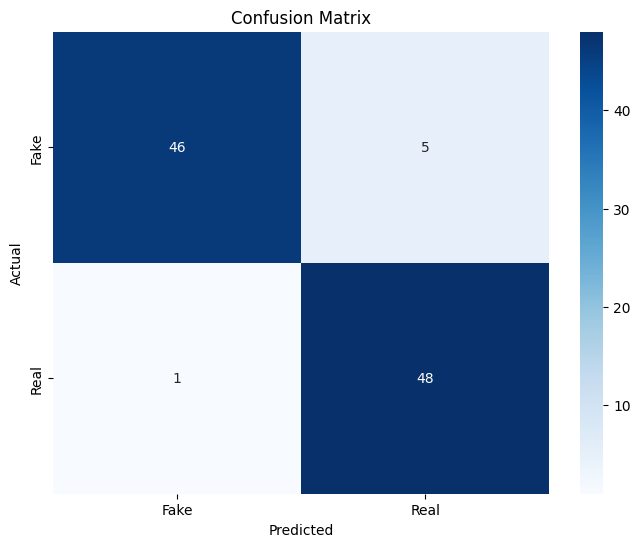

In [31]:
ConfusionMetrix = confusion_matrix(Y_test,y_pred)
print("Confusion Matrix:\n", ConfusionMetrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(ConfusionMetrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Prediction Oon TestingData

In [32]:
X_new = X_test[1]

prediction = dt.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[0]
The news is Real


Manual Testing

In [33]:
def manual_DT_prediction():
    # Taking input of any news in form of text
    X = input("ENTER A NEWS FOR PREDICTION: ")
    # Apply stemming to the input text
    X_new = stemming(X)

    # Vectorize the stemmed textvectorizer.fit(X)
    X = vectorizer.transform([X_new])
    X = X.toarray()
    
    # Make the prediction
    prediction = dt.predict(X)
    if (prediction==0):
     print('The news is Real '+prediction)
    else:
     print('The news is Fake',prediction)

# Example usage
manual_DT_prediction()

The news is Fake [1]
